# 1. 데이터 수집

In [1]:
import time
import folium
import pandas as pd
import numpy as np
import googlemaps
import matplotlib.pyplot as plt
import seaborn as sns

from urllib import parse
from matplotlib import rc
from tqdm import notebook
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager #!pip install webdriver-manager
from selenium.common.exceptions import NoSuchElementException

### 1 - 1.  야구 데이터가 있는 사이트 selenium 작업

In [2]:
url = "http://www.statiz.co.kr/stat.php"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
action = ActionChains(driver)
time.sleep(2)

driver.maximize_window()

In [10]:
def delete_ad():
    try:
        driver.find_element(By.CSS_SELECTOR,"#foin_close_02eu > a > img").click()
    except NoSuchElementException as e:
        None

In [11]:
# 투구 기록 클릭
driver.find_element(By.CSS_SELECTOR,"body > div.wrapper > div.content-wrapper > div > section.content > div > div.col-md-12.col-xs-12.col-sm-12.col-lg-3 > div > div.col-xs-12.col-sm-6.col-md-6.col-lg-12 > div > a:nth-child(6) > span").click()
time.sleep(2)

# 광고 닫기
delete_ad()

# 옵션 / 중간 보기 해제
driver.find_element(By.CSS_SELECTOR,"body > div.wrapper > div.content-wrapper > div > section.content > div > div.col-md-12.col-xs-12.col-sm-12.col-lg-12 > div:nth-child(1) > div > div:nth-child(8) > button").click()
time.sleep(1)
driver.find_element(By.CSS_SELECTOR,"#opt_div > div.box-body > div:nth-child(9) > a > img").click()
time.sleep(1)

In [12]:
# 페이지 추출 함수
def extract_play_data(starty,endy,datalist):
    
    year_tag_basic = "/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button"

    for y in notebook.tqdm(range(starty-1980,endy-1980+1)):
        delete_ad()
        year = 1980+y
        
        # 연도 버튼 클릭                                            
        driver.find_element(By.CSS_SELECTOR,"body > div.wrapper > div.content-wrapper > div > section.content > div > div.col-md-12.col-xs-12.col-sm-12.col-lg-12 > div:nth-child(1) > div > div:nth-child(1) > div > button").click()

        # 년도 클릭
        year_flag = year_tag_basic+'['+str(y)+']'
        driver.find_element(By.XPATH,year_flag).click()
        time.sleep(2)

        while (1):
            req = driver.page_source
            soup = BeautifulSoup(req, 'html.parser')
            datatable = soup.select("#mytable > tbody > tr")

            for i in range(2,len(datatable)):
                tmp_list = [year]
                for j in range(1,26):
                    tmp_list.append(datatable[i].select("td")[j].text)
                datalist.append(tmp_list)

            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # 페이지 맨 밑
            page_btns = driver.find_element(By.CSS_SELECTOR,"body > div.wrapper > div.content-wrapper > div > section.content > div > div.col-md-12.col-xs-12.col-sm-12.col-lg-12 > div:nth-child(7) > div > div > div:nth-child(5) > table > tbody > tr > td:nth-child(2)").find_elements(By.TAG_NAME, "a")

            if page_btns[-2].text == '다음':
                page_btns[-2].click()
                time.sleep(1)
            else:
                break
        
        print(year,'년도 연봉 데이터 추출 완료')

In [8]:
'''
year = []; name = []; team =[]; WAR=[]; gp = []; cg = []; sho = []; gs = []; win = []; loss = [];
save = []; hold = []; inning = []; runs = []; earned_run = []; batter_faced = [];
hits = []; base2 = []; base3 = []; home_run = []; walk = []; intentional_walk = [];
hb = []; so = []; balk=[]; wild =[]; ERA = []; FIP = []; WHIP = []; ERAplus=[]; FIPplus=[]; WAR = []; WPA = []
''';

# 컬럼 명
columns = ['년도', '이름', '팀', 'WAR', '출장', '완투', '완봉', '선발', '승',
           '패', '세이브', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런',
           '볼넷', '고4', '사구', '삼진', '보크', '폭투']

#### 83 ~ 88 년 데이터

In [13]:
data_list_1980 = []

extract_play_data(1983,1988,data_list_1980)

  0%|          | 0/6 [00:00<?, ?it/s]

1983 년도 연봉 데이터 추출 완료
1984 년도 연봉 데이터 추출 완료
1985 년도 연봉 데이터 추출 완료
1986 년도 연봉 데이터 추출 완료
1987 년도 연봉 데이터 추출 완료
1988 년도 연봉 데이터 추출 완료


#### 15 ~ 20 년 데이터

In [15]:
data_list_2010 = []

extract_play_data(2015,2020,data_list_2010)

  0%|          | 0/6 [00:00<?, ?it/s]

2015 년도 연봉 데이터 추출 완료
2016 년도 연봉 데이터 추출 완료
2017 년도 연봉 데이터 추출 완료
2018 년도 연봉 데이터 추출 완료
2019 년도 연봉 데이터 추출 완료
2020 년도 연봉 데이터 추출 완료


In [14]:
df_KBO_1980 = pd.DataFrame(data_list_1980, columns=columns)
df_KBO_1980

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,안타,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,1983,장명부,83삼,13.63,60,36,5,44,30,16,...,388,,,19,106,6,16,220,1,6
1,1983,이상윤,83해,6.79,46,14,3,22,20,10,...,181,,,10,95,0,4,178,0,3
2,1983,김시진,83삼,6.78,37,17,5,25,17,12,...,189,,,8,95,6,14,154,0,5
3,1983,이길환,83M,5.49,33,10,4,20,15,7,...,184,,,8,56,3,11,84,2,1
4,1983,임호균,83삼,5.23,35,15,1,29,12,15,...,231,,,16,52,1,6,86,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1988,배경환,88태,-0.33,13,1,1,11,1,7,...,57,,,9,23,1,1,18,1,1
448,1988,박상열,88O,-0.40,13,0,0,6,0,3,...,53,,,9,23,0,4,12,0,1
449,1988,정삼흠,88M,-0.49,27,6,1,20,5,16,...,163,,,20,61,2,14,43,0,0
450,1988,최상주,88해,-0.50,7,0,0,2,0,2,...,21,,,8,5,1,0,6,0,1


In [16]:
df_KBO_2010 = pd.DataFrame(data_list_2010, columns=columns)
df_KBO_2010

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,안타,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,2015,양현종,15K,8.14,32,1,1,31,15,6,...,150,27,2,18,78,0,7,157,0,6
1,2015,린드블럼,15롯,6.48,32,2,1,32,13,11,...,196,32,3,28,52,0,12,180,0,12
2,2015,해커,15N,5.64,31,1,0,31,19,5,...,174,34,0,14,36,1,25,164,0,6
3,2015,밴헤켄,15넥,5.12,32,0,0,32,15,8,...,190,36,3,14,67,1,1,193,0,16
4,2015,우규민,15L,4.95,25,1,0,25,11,9,...,163,26,5,13,17,0,12,119,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,2020,김주한,20S,-0.75,22,0,0,7,1,7,...,60,7,1,7,20,0,8,22,0,4
1529,2020,이민우,20K,-0.75,22,0,0,22,6,10,...,129,20,4,11,47,0,6,67,0,3
1530,2020,윤정현,20키,-0.86,15,0,0,4,0,1,...,54,6,1,3,10,0,2,11,0,1
1531,2020,장지훈,20삼,-0.98,29,0,0,0,0,1,...,39,4,0,7,21,0,3,24,0,5


#### 저장

In [17]:
df_KBO_1980.to_csv("df_KBO_1980", encoding="euc-kr")
df_KBO_2010.to_csv("df_KBO_2010", encoding="euc-kr")

In [4]:
driver.quit()

### 1 - 2. 데이터 전처리
- 연봉 컬럼 추가 : default 0
- 팀을 통일 시키기 : 과거 팀 -> 현재 팀

In [19]:
df_KBO_1980 = pd.read_csv("./df_KBO_1980", index_col=0, encoding="euc-kr")
df_KBO_2010 = pd.read_csv("./df_KBO_2010", index_col=0, encoding="euc-kr")

display(df_KBO_1980.head(3), df_KBO_2010.head(3))

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,안타,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,1983,장명부,83삼,13.63,60,36,5,44,30,16,...,388,NaN,NaN,19,106,6,16,220,1,6
1,1983,이상윤,83해,6.79,46,14,3,22,20,10,...,181,NaN,NaN,10,95,0,4,178,0,3
2,1983,김시진,83삼,6.78,37,17,5,25,17,12,...,189,NaN,NaN,8,95,6,14,154,0,5


,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,안타,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,2015,양현종,15K,8.14,32,1,1,31,15,6,...,150,27,2,18,78,0,7,157,0,6
1,2015,린드블럼,15롯,6.48,32,2,1,32,13,11,...,196,32,3,28,52,0,12,180,0,12
2,2015,해커,15N,5.64,31,1,0,31,19,5,...,174,34,0,14,36,1,25,164,0,6


In [20]:
# 연봉 열 추가
df_KBO_1980['연봉'] = 0
df_KBO_2010['연봉'] = 0

display(df_KBO_1980.head(3), df_KBO_2010.head(3))

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,1983,장명부,83삼,13.63,60,36,5,44,30,16,...,NaN,NaN,19,106,6,16,220,1,6,0
1,1983,이상윤,83해,6.79,46,14,3,22,20,10,...,NaN,NaN,10,95,0,4,178,0,3,0
2,1983,김시진,83삼,6.78,37,17,5,25,17,12,...,NaN,NaN,8,95,6,14,154,0,5,0


,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,2015,양현종,15K,8.14,32,1,1,31,15,6,...,27,2,18,78,0,7,157,0,6,0
1,2015,린드블럼,15롯,6.48,32,2,1,32,13,11,...,32,3,28,52,0,12,180,0,12,0
2,2015,해커,15N,5.64,31,1,0,31,19,5,...,34,0,14,36,1,25,164,0,6,0


#### 팀 이름 살펴보기
#### 팀 명 추출 (도중에 팀을 옮긴 경우 팀이름이 두개인데 뒤에 팀 명으로 추출)

In [21]:
df_KBO_1980['팀'] = [ i[-1] for i in df_KBO_1980['팀']]
df_KBO_2010['팀'] = [ i[-1] for i in df_KBO_2010['팀']]

display(df_KBO_1980.head(3), df_KBO_2010.head(3))

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,1983,장명부,삼,13.63,60,36,5,44,30,16,...,NaN,NaN,19,106,6,16,220,1,6,0
1,1983,이상윤,해,6.79,46,14,3,22,20,10,...,NaN,NaN,10,95,0,4,178,0,3,0
2,1983,김시진,삼,6.78,37,17,5,25,17,12,...,NaN,NaN,8,95,6,14,154,0,5,0


,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,2015,양현종,K,8.14,32,1,1,31,15,6,...,27,2,18,78,0,7,157,0,6,0
1,2015,린드블럼,롯,6.48,32,2,1,32,13,11,...,32,3,28,52,0,12,180,0,12,0
2,2015,해커,N,5.64,31,1,0,31,19,5,...,34,0,14,36,1,25,164,0,6,0


In [22]:
team_dict = {
    'LG 트윈스' : ['M', 'L'],               # 'MBC 청룡'
    '두산 베어스': ['O', '두'],             # 'OB Bears',
    '롯데 자이언츠' : '롯',                 # 'Lotte Giants',
    '한화 이글스' : ['빙', '한'],           # 'Binggre Eagles',
    '삼성 라이온즈' : '삼',                 # 'Samsung Lions',
    '키움 히어로즈' : ['청', '태', '넥', '키'],   # 'Chungbo Pintos', 'Pacific Dolphins', 넥센 
    '기아 타이거즈' : ['해', 'K'],          # 'Haitai Tigers'
    'SK 와이번즈' : 'S',
    'kt wiz' : 'k',
    'NC 다이노스' : 'N'
}

In [23]:
for i in df_KBO_1980['팀']:
    for key, value in team_dict.items():
        if i in value:
            df_KBO_1980.replace(i, key,inplace=True)

for i in df_KBO_2010['팀']:
    for key, value in team_dict.items():
        if i in value:
            df_KBO_2010.replace(i, key,inplace=True)
            
display(df_KBO_1980.head(3), df_KBO_2010.head(3))

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,1983,장명부,삼성 라이온즈,13.63,60,36,5,44,30,16,...,NaN,NaN,19,106,6,16,220,1,6,0
1,1983,이상윤,기아 타이거즈,6.79,46,14,3,22,20,10,...,NaN,NaN,10,95,0,4,178,0,3,0
2,1983,김시진,삼성 라이온즈,6.78,37,17,5,25,17,12,...,NaN,NaN,8,95,6,14,154,0,5,0


,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,2015,양현종,기아 타이거즈,8.14,32,1,1,31,15,6,...,27,2,18,78,0,7,157,0,6,0
1,2015,린드블럼,롯데 자이언츠,6.48,32,2,1,32,13,11,...,32,3,28,52,0,12,180,0,12,0
2,2015,해커,NC 다이노스,5.64,31,1,0,31,19,5,...,34,0,14,36,1,25,164,0,6,0


In [24]:
print("1980년대 팀 : ", df_KBO_1980['팀'].unique())
print("2010년대 팀 : ", df_KBO_2010['팀'].unique())

1980년대 팀 :  ['삼성 라이온즈' '기아 타이거즈' 'LG 트윈스' '롯데 자이언츠' '두산 베어스' '한화 이글스' '키움 히어로즈']
2010년대 팀 :  ['기아 타이거즈' '롯데 자이언츠' 'NC 다이노스' '키움 히어로즈' 'LG 트윈스' 'SK 와이번즈' '두산 베어스'
 '삼성 라이온즈' 'kt wiz' '한화 이글스']


##### 저장하자

In [25]:
df_KBO_1980.to_csv("df_KBO_1980", encoding="euc-kr")
df_KBO_2010.to_csv("df_KBO_2010", encoding="euc-kr")

### 1 - 3. 사이트에서 연봉 데이터 추가하기

In [26]:
df_KBO_1980 = pd.read_csv("./df_KBO_1980", index_col=0, encoding="euc-kr")
df_KBO_2010 = pd.read_csv("./df_KBO_2010", index_col=0, encoding="euc-kr")

display(df_KBO_1980.head(3), df_KBO_2010.head(3))

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,1983,장명부,삼성 라이온즈,13.63,60,36,5,44,30,16,...,NaN,NaN,19,106,6,16,220,1,6,0
1,1983,이상윤,기아 타이거즈,6.79,46,14,3,22,20,10,...,NaN,NaN,10,95,0,4,178,0,3,0
2,1983,김시진,삼성 라이온즈,6.78,37,17,5,25,17,12,...,NaN,NaN,8,95,6,14,154,0,5,0


,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,2015,양현종,기아 타이거즈,8.14,32,1,1,31,15,6,...,27,2,18,78,0,7,157,0,6,0
1,2015,린드블럼,롯데 자이언츠,6.48,32,2,1,32,13,11,...,32,3,28,52,0,12,180,0,12,0
2,2015,해커,NC 다이노스,5.64,31,1,0,31,19,5,...,34,0,14,36,1,25,164,0,6,0


In [27]:
# 사이트 접속
url = "http://www.statiz.co.kr/stat.php"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
action = ActionChains(driver)
time.sleep(2)

driver.maximize_window()

In [28]:
# 추가정보 -> 연봉 정보
action.move_to_element(driver.find_element(By.CSS_SELECTOR,"body > div.wrapper > header > nav:nth-child(3) > div > div:nth-child(1) > div:nth-child(9)")).perform()
driver.find_element(By.CSS_SELECTOR,"body > div.wrapper > header > nav:nth-child(3) > div > div:nth-child(1) > div:nth-child(9) > div > ul > li:nth-child(8) > a").click()

In [39]:
def extract_salary_data(starty, endy, df):

    year_tag_basic = "/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button"    
    
    for y in notebook.tqdm(range(starty-1980,endy-1980+1)):

        # 광고 닫기
        delete_ad()
    
        # 드롭다운 버튼 클릭
        driver.find_element(By.CSS_SELECTOR,"body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div:nth-child(1) > div > div:nth-child(1) > div > button").click()
        
        # 년도 클릭
        year_flag = year_tag_basic+'['+str(y)+']'
        driver.find_element(By.XPATH,year_flag).click()
        time.sleep(2)
        
        # 연봉데이터 테이블 가져오기
        datatable = driver.find_element(By.CSS_SELECTOR,"body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div:nth-child(2) > div > div > div.box-body.no-padding > table > tbody").find_elements(By.TAG_NAME,'tr')

        # 연봉데이터 테이블 한 개씩 추출하기
        for i in range(1,len(datatable)):
            #one_data = datatable[i].text.split(" ")
            row_datas = datatable[i].find_elements(By.TAG_NAME, "td")
            name = row_datas[0].text; year = y+1980; team = row_datas[2].text; salary = int(row_datas[3].text.replace(',',''));
            
            # 리스트에 담기
            if team == '':         
                df.loc[(df['년도']==year) & (df['이름']==name),'연봉']  = salary
            else: # 팀 명 바꿔주기
                for key, value in team_dict.items():
                    if team[0] in value:
                        team = key
                df.loc[(df['년도']==year) & (df['이름']==name) & (df['팀']==team),'연봉'] = salary
                
        print(year,'년도 연봉 데이터 추출 완료')

In [40]:
extract_salary_data(1983, 1988, df_KBO_1980)

  0%|          | 0/6 [00:00<?, ?it/s]

1983 년도 연봉 데이터 추출 완료
1984 년도 연봉 데이터 추출 완료
1985 년도 연봉 데이터 추출 완료
1986 년도 연봉 데이터 추출 완료
1987 년도 연봉 데이터 추출 완료
1988 년도 연봉 데이터 추출 완료


In [42]:
extract_salary_data(2015, 2020, df_KBO_2010)

  0%|          | 0/6 [00:00<?, ?it/s]

2015 년도 연봉 데이터 추출 완료
2016 년도 연봉 데이터 추출 완료
2017 년도 연봉 데이터 추출 완료
2018 년도 연봉 데이터 추출 완료
2019 년도 연봉 데이터 추출 완료
2020 년도 연봉 데이터 추출 완료


In [43]:
display(df_KBO_1980.head(3), df_KBO_2010.head(3))

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,1983,장명부,삼성 라이온즈,13.63,60,36,5,44,30,16,...,NaN,NaN,19,106,6,16,220,1,6,0
1,1983,이상윤,기아 타이거즈,6.79,46,14,3,22,20,10,...,NaN,NaN,10,95,0,4,178,0,3,0
2,1983,김시진,삼성 라이온즈,6.78,37,17,5,25,17,12,...,NaN,NaN,8,95,6,14,154,0,5,0


,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,2015,양현종,기아 타이거즈,8.14,32,1,1,31,15,6,...,27,2,18,78,0,7,157,0,6,75000
1,2015,린드블럼,롯데 자이언츠,6.48,32,2,1,32,13,11,...,32,3,28,52,0,12,180,0,12,120000
2,2015,해커,NC 다이노스,5.64,31,1,0,31,19,5,...,34,0,14,36,1,25,164,0,6,60000


In [44]:
df_KBO_1980['연봉'].unique()

array([0], dtype=object)

In [46]:
df_KBO_2010['연봉'].unique()

array([75000, 120000, 60000, 65000, 40000, 50000, 0, 85000, 80000, 125000,
       63000, 45000, 100000, 170000, 30000, 52500, 28000, 32000, 20000,
       25000, 35000, 55000, 70000, 22000, 150000, 210000, 22500, 21000,
       33000, 135000, 140000, 230000, 23500, 111000, 23000, 24000, 29000,
       95000, 117000, 110000, 15000, 17000, 76000, 9000, 10000, 3500,
       3700, 3600, 5800, 90000, 5000, 18800, 6000, 4000, 18000, 5500,
       7100, 47900, 25700, 27000, 26000, 37000, 47000, 27500, 42000],
      dtype=object)

- 80년대는 연봉정보 전멸... 

##### 저장하자

In [48]:
df_KBO_1980.to_csv("df_KBO_1980", encoding="euc-kr")
df_KBO_2010.to_csv("df_KBO_2010", encoding="euc-kr")

In [47]:
driver.quit()

---

---

---

---

# 2. 수집 데이터 전처리
```
0. 데이터 정제(정규화나 표준화를 통해 데이터를 정제), 범주형 데이터 인코딩 작업을 해준다.
1. 우선, 다변량 데이터의 값이 있는지 없는지를 판별한다. --> isnull()
2. 데이터 값이 없다면, dropna(inplace=True) 를 통해서 결손값 데이터를 삭제해준다.
  
    - 1980년대는 연봉데이터가 없기 때문에 2010년대 데이터로 학습을 진행 (연봉이 0인 행은 제외)
    - 1980년대에서 2타,3타는 결측 컬럼이라 제거
    
    - 여기는 서로 다른 범위의 데이터라 정규화를 사용하도록 한다.
    - 팀은 원 핫 인코딩으로 범주형 데이터를 분석에 사용하자.

      (inplace=True : 값자체를 바꿔주는 것, inplace=False: 그냥 값 불러와서 바꿔준 값을 보여줌)

3. pandas 라이브러리의 corr()함수를 사용하여 상관행렬(correlation matrix) 생성해준다.
4. seaborn 라이브러리의 heatmap() 함수를 사용하여 상관행렬을 그려준다. (상관계수로 데이터 골라내도 된다.)
5. seaborn 라이브러리의 pariplot() 함수를 사용하여 특징들의 쌍 그림을 확인하고 중요 특징을 추출한다.

    - corr()값이 0.5이상을 우선 사용해보자
    - 하지만 많은 변수와 상관관계가 높으면 다공 공선성 문제가 발생한다. 이는 나중에 VIF factor로 조정하자.

6. 다변량 선형 회귀에 사용할 데이터를 훈련용과 검증용으로 분리한다.

7. 정규화나 표준화를 통해 데이터를 정제하여 선형회귀 분석한다.
  
    - 여기는 서로 다른 범위의 데이터라 정규화를 사용하도록 한다.
    - 팀은 원 핫 인코딩으로 범주형 데이터를 분석에 사용하자.
```   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

from matplotlib import rc
from tqdm import notebook

In [2]:
df_KBO_1980 = pd.read_csv("./df_KBO_1980", index_col=0, encoding="euc-kr")
df_KBO_2010 = pd.read_csv("./df_KBO_2010", index_col=0, encoding="euc-kr")

display(df_KBO_1980.head(3), df_KBO_2010.head(3))

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,1983,장명부,삼성 라이온즈,13.63,60,36,5,44,30,16,...,NaN,NaN,19,106,6,16,220,1,6,0
1,1983,이상윤,기아 타이거즈,6.79,46,14,3,22,20,10,...,NaN,NaN,10,95,0,4,178,0,3,0
2,1983,김시진,삼성 라이온즈,6.78,37,17,5,25,17,12,...,NaN,NaN,8,95,6,14,154,0,5,0


,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,2015,양현종,기아 타이거즈,8.14,32,1,1,31,15,6,...,27,2,18,78,0,7,157,0,6,75000
1,2015,린드블럼,롯데 자이언츠,6.48,32,2,1,32,13,11,...,32,3,28,52,0,12,180,0,12,120000
2,2015,해커,NC 다이노스,5.64,31,1,0,31,19,5,...,34,0,14,36,1,25,164,0,6,60000


## 데이터 전처리 1. 
- 필요 없는 데이터 제거 및 데이터 분리( 학습, 테스트, 원 핫 인코딩)
- 데이터 스케일화

#### 학습데이터프레임분리 / 팀, 연봉 컬럼 분리 

In [3]:
df_KBO_2010_fit = df_KBO_2010.copy()
df_KBO_2010_fit = df_KBO_2010_fit[df_KBO_2010_fit['연봉']>0]

team = df_KBO_2010_fit['팀']
salary = df_KBO_2010_fit['연봉']

df_KBO_2010_fit.drop(['년도', '이름', '팀', '2타', '3타','연봉'], axis=1,inplace=True)
df_KBO_2010_fit

,WAR,출장,완투,완봉,선발,승,패,세이브,홀드,이닝,...,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,8.14,32,1,1,31,15,6,0,1,184.1,...,50,756,150,18,78,0,7,157,0,6
1,6.48,32,2,1,32,13,11,0,0,210.0,...,83,861,196,28,52,0,12,180,0,12
2,5.64,31,1,0,31,19,5,0,0,204.0,...,71,833,174,14,36,1,25,164,0,6
3,5.12,32,0,0,32,15,8,0,0,196.2,...,79,825,190,14,67,1,1,193,0,16
4,4.95,25,1,0,25,11,9,0,0,152.2,...,58,621,163,13,17,0,12,119,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,-0.16,5,1,0,5,0,2,0,0,18.2,...,12,84,19,0,11,0,3,4,0,0
1501,-0.32,2,0,0,2,0,2,0,0,10.2,...,8,52,16,1,4,0,0,6,0,1
1506,-0.38,2,0,0,2,0,1,0,0,5.2,...,8,30,9,1,6,0,0,2,0,0
1512,-0.50,19,0,0,19,5,6,0,0,90.2,...,66,410,105,14,43,0,5,61,1,4


#### 팀 컬럼 원 핫 인코딩

In [4]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
## 나중에 편하게 1980년 대 인코딩 순서에 맞추자 
## : LG 트윈스	기아 타이거즈	두산 베어스	롯데 자이언츠	삼성 라이온즈	키움 히어로즈	한화 이글스 + aaa
## kt wiz 는 전부 0이라 제거

team_encoding = pd.get_dummies(team)
tmp = team_encoding.loc[:, ['NC 다이노스','SK 와이번즈']]
team_encoding.drop(['NC 다이노스','SK 와이번즈','kt wiz'], axis=1,inplace=True)
team_encoding = pd.concat([team_encoding,tmp], axis=1)

df_KBO_2010_fit = df_KBO_2010_fit.join(team_encoding)
df_KBO_2010_fit = df_KBO_2010_fit.fillna(0)
df_KBO_2010_fit

,WAR,출장,완투,완봉,선발,승,패,세이브,홀드,이닝,...,폭투,LG 트윈스,기아 타이거즈,두산 베어스,롯데 자이언츠,삼성 라이온즈,키움 히어로즈,한화 이글스,NC 다이노스,SK 와이번즈
0,8.14,32,1,1,31,15,6,0,1,184.1,...,6,0,1,0,0,0,0,0,0,0
1,6.48,32,2,1,32,13,11,0,0,210.0,...,12,0,0,0,1,0,0,0,0,0
2,5.64,31,1,0,31,19,5,0,0,204.0,...,6,0,0,0,0,0,0,0,1,0
3,5.12,32,0,0,32,15,8,0,0,196.2,...,16,0,0,0,0,0,1,0,0,0
4,4.95,25,1,0,25,11,9,0,0,152.2,...,2,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,-0.16,5,1,0,5,0,2,0,0,18.2,...,0,0,0,0,0,1,0,0,0,0
1501,-0.32,2,0,0,2,0,2,0,0,10.2,...,1,0,0,0,0,0,0,0,0,1
1506,-0.38,2,0,0,2,0,1,0,0,5.2,...,0,0,0,1,0,0,0,0,0,0
1512,-0.50,19,0,0,19,5,6,0,0,90.2,...,4,0,0,0,0,0,0,0,1,0


## 학습 진행
```
- 1. 트레이닝/ 테스트 데이터 분리
- 2. 학습 최적화
    
    - pipline 스케일화 3개 생성
    - 팀 컬럼 원 핫 인코딩 추가
    - 다중 공선성 상관관계 높은 변수 제거 등 변수 조정
    - pipline 학습 반복

- 3. 가장 좋은 경우 추출
- 4. OLS로 결과 요약
- 5. 계수와 절편을 추출해서 함수로 만듬
- 6. 최동원 데이터 넣어서 연봉 예측
```

#### 1. 학습 데이터 / 테스트 데이터 분리

In [5]:
from sklearn.model_selection import train_test_split

X = df_KBO_2010_fit
y = salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

##### 다중 공선성 문제
다중공선성 문제는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다.
즉, 예측할 변수들이 다른 변수에도 영향을 끼치면 예측이 어려워지거나 잘못 예측하는 문제가 발생한다. 따라서 통계적으로 회귀 분석을 진행할때, 다중 공선성 문제를 고려할 필요가 있다.

독립 변수가 많이 투입되면, 결정 계수는 높아지는 경향성이 있지만 회귀 계수는 신뢰하지 못하게 될 수 있습니다. 공차 한계(Tolerance)와 VIF(Variance Inflation Factor)를 통해 검정 할 수 있으며 다중공선성이 높은 독립변수가 있다면 그 변수를 삭제하는 것을 고려해야 합니다.

구체적으로 이야기해보면, 선형 모델을 만든다는 것은 독립 변수와 결과값 간의 관계를 설명하는 선형 모델의 가중치(=회귀 계수)를 찾는 것입니다. 여기서의 회귀 계수가 의미하는 것은 독립 변수 x의 한 단위가 바뀔때 결과 값 y가 변하는 정도를 말하는데, 회귀 계수끼리 상관성이 높다면 결과값 y가 변화하는 것이 x1 혹은 x2의 독립적인 영향 만을 의미하는지 확신할 수 없게 됩니다.

#####  변수 상관관계 파익 : vif factor 계산

In [6]:
#def VIF_feature_engineering(order, df, handle_num, ascending=False):    
def VIF_feature_engineering(df,ascending=False):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(
        df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    return vif.sort_values(by='VIF_Factor', ascending=False).reset_index(drop=True)
    '''
    if order == 'show': # 원하는 숫자 만큼 단순 출력
        return vif.sort_values(by='VIF_Factor', ascending=ascending).head(handle_num)
    
    elif order == 'split': # 원하는 숫자 만큼 정렬 후 features 리스트 반환
        return vif.sort_values(by='VIF_Factor', ascending=ascending)['features'][:handle_num].values
    
    elif order == 'masking': # 원하는 숫자 이하로 마스킹 후 features 리스트 반환
        return vif[vif['VIF_Factor'] < handle_num]['features'].values
    ''';

In [7]:
VIF_feature_engineering(X_train).head()

,VIF_Factor,features
0,18687.999715,타자
1,11087.869015,이닝
2,1031.417981,안타
3,852.382160,실점
4,570.269819,자책


- 하지만 일일히 vif factor를 보면서 변수를 고르는데는 번거롭다..
- sklearn에서 사용하는 방법 두가지를 사용해 다중공선성 문제를 잡아보자
    

#### - 1. SelectKBest 기능 사용
   - target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈.
   - 회귀모델이니 f_regresison를 사용

#### - 2. 회귀모델에 규제를 가하는 방식, 규제를 통해 설명력이 좋은 변수는 남기고 좋지 않은 변수는 버리는 방식의 변수선택 개념.
       alpha: 규제 계수 (값이 커질 수록 큰 규제입니다.)

   ##### LASSO[라쏘]
기존의 선형 회귀에선 적절한 가중치와 편향을 찾아내는 것이 관건이었다. 라쏘는 거기에 추가적인 제약 조건을 준다. 바로 MSE가 최소가 되게 하는 가중치와 편향을 찾으면서 동시에, 가중치들의 절댓값의 합이 최소가 되게 한다는 것이다. 다시 말해, 가중치의 모든 원소가 0이 되거나 0에 가깝게 되도록 해야 한다.
<br>
   ##### Ridge[릿지]
라쏘와 굉장히 유사한 릿지에 대해 간단히만 언급하자면 패널티 항에 L1-norm 대신에 L2-norm 패널티를 가진다. 차이가 있다면 라쏘는 가중치들이 0이 되지만, 릿지의 가중치들은 0에 가까워질 뿐 0이 되지는 않는다.
<br>
   ##### Elastic : 릿지 + 라쏘 

- 요약 : 특성이 많은데 그중 일부분만 중요하다면 라쏘가, 특성의 중요도가 전체적으로 비슷하다면 릿지가 좀 더 괜찮은 모델을 찾아줄 것이다. 잘 모르면 엘라스틱 권장.

    릿지: L2 규제를 사용!! -> 설명력이 낮은 변수를 0으로, 특성 무력화
    라쏘: L1 규제를 사용!! -> 설명력이 낮은 변수를 0에 가깝게, 특성들의 영향력 감소
    엘라스틱: 릿지 + 라쏘 적절히 조합!!

C:\Users\Sam\miniconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.615e+10, tolerance: 8.583e+10
  model = cd_fast.enet_coordinate_descent(


finish


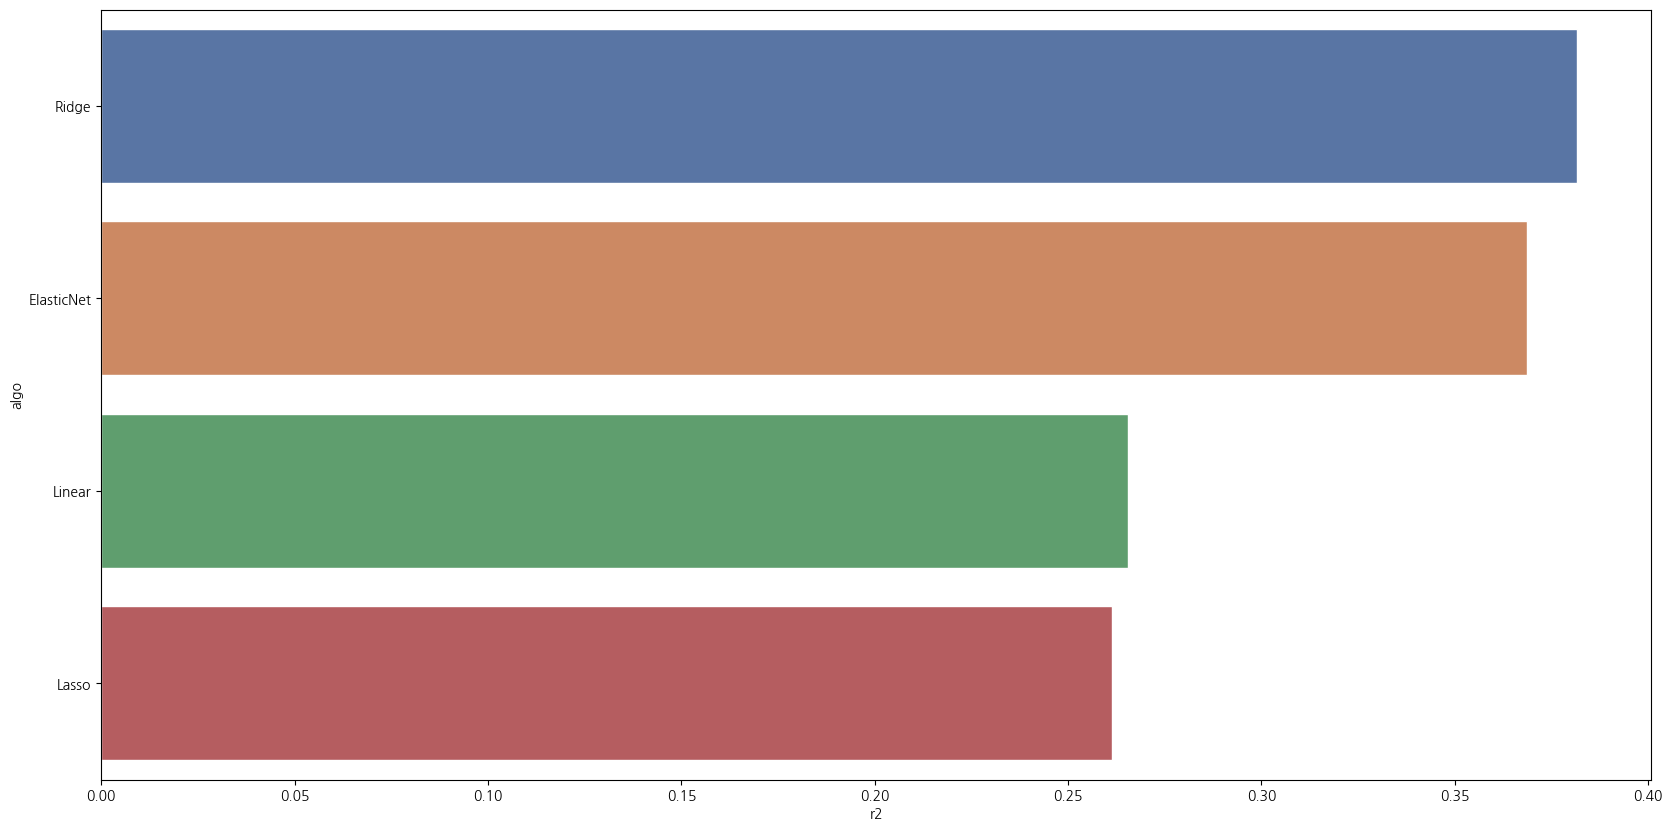

In [8]:
import numpy as np

from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#from sklearn.preprocessing import PolynomialFeatures # 선형 회귀를 다항 회귀로 

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression, SelectKBest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)

pipe_linear = Pipeline([
                ('scl', MinMaxScaler()),
                ('kbest',SelectKBest(score_func=f_regression)),
                ('fit', LinearRegression())])

pipe_lasso = Pipeline([
                ('scl', MinMaxScaler()),
                ('kbest',SelectKBest(score_func=f_regression)),
                ('fit', Lasso(random_state = 42))])

pipe_ridge = Pipeline([
                ('scl', MinMaxScaler()),
                ('kbest',SelectKBest(score_func=f_regression)),
                ('fit', Ridge(random_state = 42))])         

pipe_elastic = Pipeline([
                ('scl', MinMaxScaler()),
                ('kbest',SelectKBest(score_func=f_regression)),
                ('fit', ElasticNet(random_state = 42))])                  

alpha = [0.001, 0.01, 0.05, 1.0, 1, 5, 10]
k = [10,15,20,30]

grid_params_linear = [{
    "kbest__k" : k,
    "fit__fit_intercept" : [True, False],
}]

grid_params_lasso = [{
    "fit__max_iter": [500, 1000, 1500, 2000],
    "kbest__k" : k,
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : alpha #np.logspace(-5,1,5),
                     }]

grid_params_ridge = [{
    "fit__max_iter": [500, 1000, 1500, 2000],
    "kbest__k" : k,
    "fit__alpha" : alpha,    # np.linspace(2,5,5) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]

grid_params_elastic = [{
    "fit__max_iter": [500, 1000, 1500, 2000],
    "kbest__k" : k,
    "fit__alpha" : alpha,       # np.linspace(2,5,10) ,
    "fit__l1_ratio" : [0.1, 0.3, 0.5, 0.7, 0.9],
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]

pipe = [pipe_linear , pipe_lasso , pipe_ridge, pipe_elastic]
params = [grid_params_linear , grid_params_lasso , grid_params_ridge, grid_params_elastic]

jobs = 20

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'Ridge',
    3: 'ElasticNet'
            }

model_object = {}; model_rmse = {}; model_mse = {}; model_r2 = {}; model_best_params = {}

#1. scoring = 'neg_mean_absolute_error' 로 설정.
# 일반적으로 scoring을 값이 클 수록 모델 성능이 좋은 것으로 사이킷런에서 인식하는데, 
# mae는 값이 클 수록 모델 성능이 저하되는 것이므로 Negative 키워드를 붙여서 사용

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 ) #  verbose가 있으면 함수 수행시 발생하는 상세한 정보 출력
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
       
    model_object[grid_dict.get(idx)] = search
    model_rmse[grid_dict.get(idx)] = np.sqrt(mse(y_test, y_pred))
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
    
print("finish")

fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show()

### 모델 평가

##### - [RMSE]
    - RMSE(평균 제곱근 오차 , Root Mean Squared Error)는 회귀 분석을 평가할 때 가장 많이 쓰는 지표 중 하나이다.
    - 원래 데이터에서 평균을 뺀 값을 제곱하여 모두 더한 뒤 전체 개수로 나눈 값에 루트를 씌운 것이다. 
    - RMSE는 낮을수록 정밀도가 높다. 대략 1보다 낮은 값은 좋다고 생각한다. 예시로 0.000001이면 매우 좋다고 할 수 있다.<br>

##### - [R2_score]
    - 다중선형회귀 모델의 정확도를 평가할 때는 잔차 분석(Analysis)을 하면 된다. 잔차는 실제 값 y와 예측된 값 ŷ의 차 e를 말한다.
    - sklearn의 linear_model.LinearRegression를 사용해서 모델을 생성하면 .score()라는 메서드를 사용
    - 결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명한다
    - 보통 0.7 ~ 0.8 정도의 값이 나오면 적합이 잘 되었다고 판단

- 변수가 너무 많다 싶을땐 Adjusted R-squared를 사용(독립변수의 수를 알아야 함?)


In [ ]:
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(score_func=f_regression,k=10)

In [ ]:
all_names = X_train.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)
[출처] [데이터사이언스] 머신러닝 변수 선택 feature selecting — SelectKBest 사례 연습(주택가격 데이터를 바탕으로)|작성자 Jalynne

In [9]:
model_rmse

{'Linear': 34266.879165631544,
 'Lasso': 34361.851905359414,
 'Ridge': 31438.280979129977,
 'ElasticNet': 31766.202485717735}

In [10]:
model_r2

{'Linear': 0.26545664811889647,
 'Lasso': 0.2613793425381623,
 'Ridge': 0.38171898897569534,
 'ElasticNet': 0.36875358320414753}

In [11]:
model_best_params

{'Linear': {'fit__fit_intercept': True, 'kbest__k': 10},
 'Lasso': {'fit__alpha': 0.01,
  'fit__max_iter': 500,
  'fit__tol': 0.2782559402207126,
  'kbest__k': 10},
 'Ridge': {'fit__alpha': 10,
  'fit__max_iter': 500,
  'fit__solver': 'sparse_cg',
  'fit__tol': 0.021544346900318846,
  'kbest__k': 30},
 'ElasticNet': {'fit__alpha': 1.0,
  'fit__l1_ratio': 0.9,
  'fit__max_iter': 500,
  'fit__tol': 1.0,
  'kbest__k': 30}}

### 가장 좋은 결과

```
'ElasticNet': {'fit__alpha': 1.0,
  'fit__l1_ratio': 0.7,
  'fit__max_iter': 500,
  'fit__tol': 0.2782559402207126,
  'kbest__k': 30,
  'poly__degree': 1}}
```

In [15]:
best_model = model_object["Linear"].best_estimator_.named_steps.fit
best_model

LinearRegression()

In [16]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul set complete in your MAC!")
    rc("font", family = "Arial Unicode MS")
    
elif platform.system() == "Windows":
    print("Hangul set complete in your Windows!")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family = font_name)

else:
    print("Unknown your system....")
    
plt.rcParams["axes.unicode_minus"] = False

def seaborn_Hangul():
    ## seaborn 한글
    plt.rc("font", family = "Malgun Gothic")
    sns.set(font="Malgun Gothic", 
    rc={"axes.unicode_minus":False}, style='white')

Hangul set complete in your Windows!


In [17]:
pred_train = best_model.predict(X_train.values)

plt.figure(figsize=(15,8))
plt.scatter(y_train, pred_train )
plt.xlabel('Real')
plt.ylabel('pred')
plt.plot([0,150000], [0,150000], 'r')
plt.show()

ValueError: X has 30 features, but LinearRegression is expecting 10 features as input.

## 최동원 연봉 예측하기

##### 최동원 데이터 불러오기

In [18]:
CDW = df_KBO_1980.loc[df_KBO_1980['이름']=='최동원']
CDW.reset_index(drop=True, inplace=True)
CDW

,년도,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
0,1983,최동원,롯데 자이언츠,5.00,38,16,1,21,9,16,...,NaN,NaN,17,51,2,8,148,0,3,0
1,1984,최동원,롯데 자이언츠,9.72,51,14,1,20,27,13,...,NaN,NaN,18,68,1,14,223,0,3,0
2,1985,최동원,롯데 자이언츠,9.88,42,14,4,17,20,9,...,NaN,NaN,7,41,2,8,161,1,3,0
3,1986,최동원,롯데 자이언츠,11.74,39,17,4,21,19,14,...,NaN,NaN,7,55,5,6,208,0,2,0
4,1987,최동원,롯데 자이언츠,7.15,32,15,4,22,14,12,...,NaN,NaN,6,61,2,7,163,0,3,0
5,1988,최동원,롯데 자이언츠,3.86,16,3,1,4,7,3,...,NaN,NaN,4,24,3,1,83,1,1,0


##### 필요없는 컬럼 제거

In [19]:
years = CDW['년도']

CDW.drop(['년도', '이름', '팀', '2타', '3타','연봉'], axis=1,inplace=True)
CDW

C:\Users\Sam\AppData\Local\Temp\ipykernel_2576\2459867941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDW.drop(['년도', '이름', '팀', '2타', '3타','연봉'], axis=1,inplace=True)


,WAR,출장,완투,완봉,선발,승,패,세이브,홀드,이닝,...,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,5.00,38,16,1,21,9,16,4,0,208.2,...,67,863,202,17,51,2,8,148,0,3
1,9.72,51,14,1,20,27,13,6,0,284.2,...,76,1132,229,18,68,1,14,223,0,3
2,9.88,42,14,4,17,20,9,8,0,225.0,...,48,865,170,7,41,2,8,161,1,3
3,11.74,39,17,4,21,19,14,2,0,267.0,...,46,1039,204,7,55,5,6,208,0,2
4,7.15,32,15,4,22,14,12,2,0,224.0,...,70,920,218,6,61,2,7,163,0,3
5,3.86,16,3,1,4,7,3,3,0,83.1,...,19,349,77,4,24,3,1,83,1,1


##### 팀 컬럼 원 핫 인코딩 

In [20]:
CDW = CDW.join(team_encoding)
CDW = CDW.fillna(0)
CDW

,WAR,출장,완투,완봉,선발,승,패,세이브,홀드,이닝,...,폭투,LG 트윈스,기아 타이거즈,두산 베어스,롯데 자이언츠,삼성 라이온즈,키움 히어로즈,한화 이글스,NC 다이노스,SK 와이번즈
0,5.00,38,16,1,21,9,16,4,0,208.2,...,3,0,1,0,0,0,0,0,0,0
1,9.72,51,14,1,20,27,13,6,0,284.2,...,3,0,0,0,1,0,0,0,0,0
2,9.88,42,14,4,17,20,9,8,0,225.0,...,3,0,0,0,0,0,0,0,1,0
3,11.74,39,17,4,21,19,14,2,0,267.0,...,2,0,0,0,0,0,1,0,0,0
4,7.15,32,15,4,22,14,12,2,0,224.0,...,3,1,0,0,0,0,0,0,0,0
5,3.86,16,3,1,4,7,3,3,0,83.1,...,1,0,0,0,0,0,0,0,0,1


### 예측

In [21]:
for idx, rows in CDW.iterrows():
    pred_CDW = best_model.predict([CDW.iloc[idx]])
    money = int(pred_CDW[0])
    print(f'{years[idx]}년도 최동원의 예측 연봉 : {money} 만원 ({money//10000}억원)')

1983년도 최동원의 예측 연봉 : 4161687 만원 (416억원)
1984년도 최동원의 예측 연봉 : 5480654 만원 (548억원)
1985년도 최동원의 예측 연봉 : 4169026 만원 (416억원)
1986년도 최동원의 예측 연봉 : 5113297 만원 (511억원)
1987년도 최동원의 예측 연봉 : 4515190 만원 (451억원)
1988년도 최동원의 예측 연봉 : 1802916 만원 (180억원)
